In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline
plt.style.use('paper')

0.9502945916153205 1.6817928305074292


/home/dtamayo/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in power
  # This is added back by InteractiveShellApp.init_path()
/home/dtamayo/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in power
  app.launch_new_instance()
/home/dtamayo/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in power
/home/dtamayo/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in power


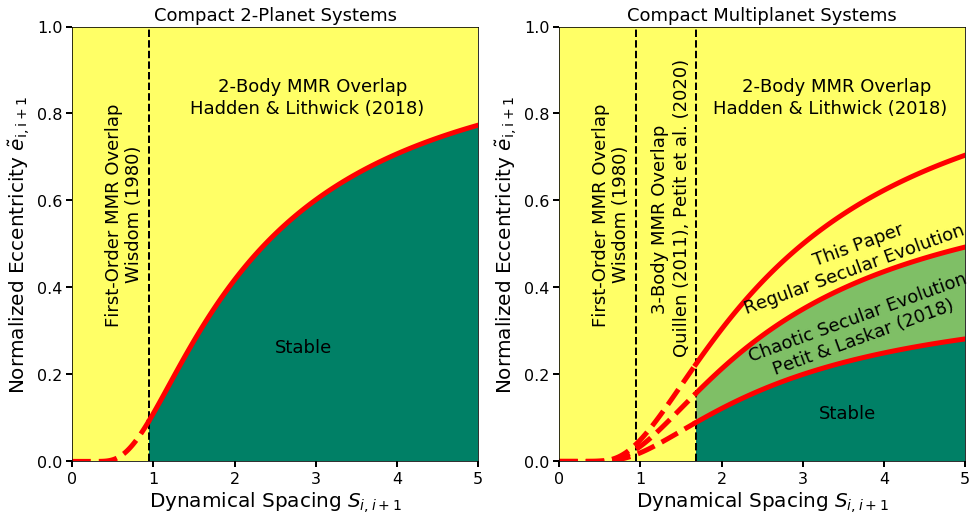

In [4]:
cmap=cm.get_cmap("summer")
deltamax = 5
mu=3e-6

daWisdom = 1.46*(2*mu)**(2/7)
deltaWisdom = daWisdom/(2*mu)**(1/4)
deltaPetit = 2/2**(1/4)
deltas = np.linspace(0,deltamax,100)
print(deltaWisdom, deltaPetit)
fig, axarr = plt.subplots(figsize=(16,8), ncols=2)
ecrit = np.exp(-2.2*(deltas)**(-4/3))

ax = axarr[0]
deltaslow = np.linspace(0, deltaWisdom, 100)
deltashigh = np.linspace(deltaWisdom, deltamax, 100)
ecritlow = np.exp(-2.2*(deltaslow)**(-4/3))
ecrithigh = np.exp(-2.2*(deltashigh)**(-4/3))

ax.axvline(deltaWisdom, color='black', lw=2, linestyle='--', alpha=1)
ax.fill_between(deltas, 0, 1, facecolor=cmap(1000), alpha=1)#, transform=trans)
#ax.fill_between([0, deltaWisdom], 0, 1, facecolor=cmap(1000), alpha=1)#, transform=trans)
ax.fill_between(deltas, 0, ecrit, facecolor=cmap(0), alpha=1)#, transform=trans)
ax.fill_between(deltaslow, 0, 1, facecolor=cmap(1000), alpha=1)#, transform=trans)



ax.plot(deltaslow, ecritlow, 'r--', lw=5)
ax.plot(deltashigh, ecrithigh, 'r', lw=5)

ax.text(0.4, 0.32, 'First-Order MMR Overlap', rotation=90, fontsize=18)
ax.text(0.65, 0.42, 'Wisdom (1980)', rotation=90, fontsize=18)
ax.text(1.8, 0.85, '2-Body MMR Overlap', fontsize=18)
ax.text(1.45, 0.8, 'Hadden & Lithwick (2018)', fontsize=18)

ax.text(2.5, 0.25, 'Stable', fontsize=18)
ax.set_title('Compact 2-Planet Systems', fontsize=18)

ecrit = np.exp(-3*(deltas)**(-4/3))
ax = axarr[1]
ax.axvline(deltaWisdom, color='black', lw=2, linestyle='--', alpha=1)
ax.axvline(deltaPetit, color='black', lw=2, linestyle='--', alpha=1)


deltaslow = np.linspace(0, deltaPetit, 100)
deltashigh = np.linspace(deltaPetit, deltamax, 100)
ecritlow = np.exp(-3*(deltaslow)**(-4/3))
ecrithigh = np.exp(-3*(deltashigh)**(-4/3))

ax.fill_between(deltas, 0, 1, facecolor=cmap(1000), alpha=1)#, transform=trans)
ax.fill_between(deltas, 0, 0.4*ecrit, facecolor=cmap(0), alpha=1)#, transform=trans)
ax.fill_between(deltas, 0.4*ecrit, 0.7*ecrit, facecolor=cmap(0), alpha=0.5)#, transform=trans)
ax.fill_between(deltaslow, 0, 1, facecolor=cmap(1000), alpha=1)#, transform=trans)


#ax.fill_between(deltas, ecrit, 1, facecolor=cmap(1000), alpha=1)#, transform=trans)
#ax.fill_between([0, deltaPetit], 0, 1, facecolor=cmap(1000), alpha=1)#, transform=trans)


ax.plot(deltaslow, ecritlow, 'r--', lw=5)
ax.plot(deltashigh, ecrithigh, 'r', lw=5)
ax.plot(deltaslow, 0.7*ecritlow, 'r--', lw=5)
ax.plot(deltashigh, 0.7*ecrithigh, 'r', lw=5)
ax.plot(deltaslow, 0.4*ecritlow, 'r--', lw=5)
ax.plot(deltashigh, 0.4*ecrithigh, 'r', lw=5)

ax.text(0.4, 0.32, 'First-Order MMR Overlap', rotation=90, fontsize=18)
ax.text(0.65, 0.42, 'Wisdom (1980)', rotation=90, fontsize=18)
ax.text(1.13, 0.35, '3-Body MMR Overlap', rotation=90, fontsize=18)
ax.text(1.4, 0.25, 'Quillen (2011), Petit et al. (2020)', rotation=90, fontsize=18)

ax.text(2.25, 0.34, 'Regular Secular Evolution', rotation=20, fontsize=18)
ax.text(3.1, 0.45, 'This Paper', rotation=20, fontsize=18)

ax.text(2.3, 0.23, 'Chaotic Secular Evolution', rotation=20, fontsize=18)
ax.text(2.6, 0.2, 'Petit & Laskar (2018)', rotation=20, fontsize=18)


ax.text(2.25, 0.85, '2-Body MMR Overlap', fontsize=18)
ax.text(1.9, 0.8, 'Hadden & Lithwick (2018)', fontsize=18)
ax.text(3.2, 0.1, 'Stable', fontsize=18)

ax.set_title('Compact Multiplanet Systems', fontsize=18)
for ax in axarr:
    ax.set_xlim([0,deltamax])
    ax.set_ylim([0,1])
    ax.set_xlabel(r'Dynamical Spacing $S_{i,i+1}$')
    ax.set_ylabel(r'Normalized Eccentricity $\tilde{e}_{\rm{i,i+1}}}$')
    
fig.savefig('schematic.pdf')

In [9]:
def get_centered_grid(xlist, ylist, poolresults):  
    # assumes uniformly spaced values in x and y (can have different lengths)
    dx = xlist[1]-xlist[0]
    dy = ylist[1]-ylist[0]

    xgrid = [x - dx/2 for x in xlist] + [xlist[-1]+dx/2]
    ygrid = [y - dy/2 for y in ylist] + [ylist[-1]+dy/2]

    X, Y = np.meshgrid(xgrid, ygrid)
    Z = np.array(poolresults).reshape(len(ylist),len(xlist))

    return X,Y,Z

def relativelyprime(num1, num2):
    mn = min(num1, num2) 
    for i in range(1, mn+1): 
         if num1%i==0 and num2%i==0: 
             hcf = i 
    if hcf == 1: 
         return True
    else: 
         return False

0.9502945916153205 1.6817928305074292


/home/dtamayo/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in power
  # This is added back by InteractiveShellApp.init_path()
/home/dtamayo/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in power
  app.launch_new_instance()
/home/dtamayo/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:84: RuntimeWarning: divide by zero encountered in power


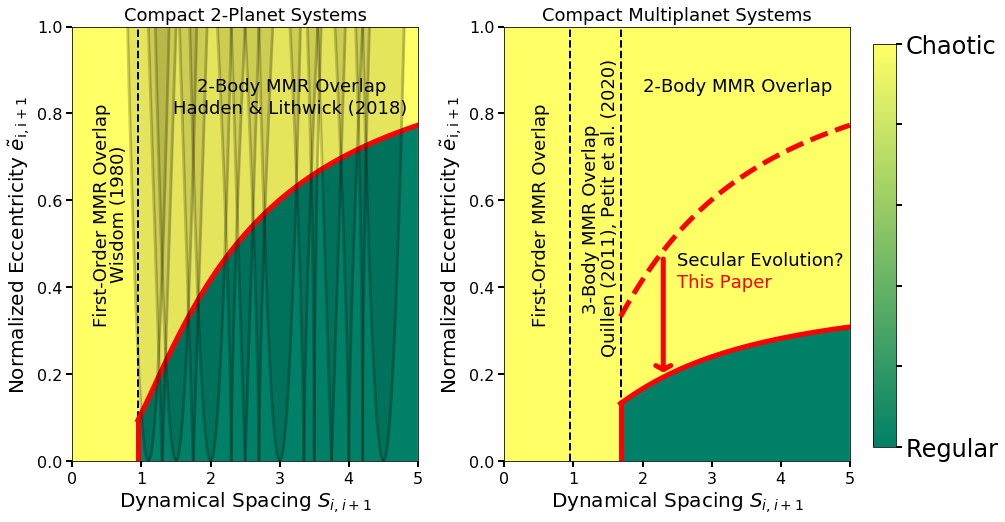

In [51]:
cmap=cm.get_cmap("summer")
deltamax = 5
mu=3e-6

daWisdom = 1.46*(2*mu)**(2/7)
deltaWisdom = daWisdom/(2*mu)**(1/4)
deltaPetit = 2/2**(1/4)
deltas = np.linspace(0,deltamax,100)
print(deltaWisdom, deltaPetit)
fig, axarr = plt.subplots(figsize=(16,8), ncols=2)
ecrit = np.exp(-2.2*(deltas)**(-4/3))

ax = axarr[0]
deltaslow = np.linspace(0, deltaWisdom, 100)
deltashigh = np.linspace(deltaWisdom, deltamax, 100)
ecritlow = np.exp(-2.2*(deltaslow)**(-4/3))
ecrithigh = np.exp(-2.2*(deltashigh)**(-4/3))

ax.axvline(deltaWisdom, color='black', lw=2, linestyle='--', alpha=1)
ax.fill_between(deltas, 0, 1, facecolor=cmap(1000), alpha=1)#, transform=trans)
#ax.fill_between([0, deltaWisdom], 0, 1, facecolor=cmap(1000), alpha=1)#, transform=trans)
ax.fill_between(deltas, 0, ecrit, facecolor=cmap(0), alpha=1)#, transform=trans)
ax.fill_between(deltaslow, 0, 1, facecolor=cmap(1000), alpha=1)#, transform=trans)

ax.plot([deltashigh[0], deltashigh[0]], [0, ecrithigh[0]], 'r', lw=5)
ax.plot(deltashigh, ecrithigh, 'r', lw=5)

ax.text(0.3, 0.32, 'First-Order MMR Overlap', rotation=90, fontsize=18)
ax.text(0.55, 0.42, 'Wisdom (1980)', rotation=90, fontsize=18)
ax.text(1.8, 0.85, '2-Body MMR Overlap', fontsize=18)
ax.text(1.45, 0.8, 'Hadden & Lithwick (2018)', fontsize=18)

ax.set_title('Compact 2-Planet Systems', fontsize=18)

h = [0, 0.535, 0.426, 0.420, 0.454, 0.519, 0.613, 0.742, 0.914, 1.143, 1.445] # coefficients for k order resonances

k=1
for S in [1.1, 1.5, 2, 3, 4.5]:
    es = np.linspace(0, 1, 100)
    dS = 0.3*(es)**(k/2)
    ax.plot(S+dS, es, 'k', alpha=0.2)
    ax.plot(S-dS, es, 'k', alpha=0.2)
    ax.fill_betweenx(es, S-dS, S+dS, alpha=0.1, color='k')      

k=2
for S in [1.3, 1.75, 2.5, 3.75]:
    es = np.linspace(0, 1, 100)
    dS = 0.2*(es)**(k/2)
    ax.plot(S+dS, es, 'k', alpha=0.2)
    ax.plot(S-dS, es, 'k', alpha=0.2)
    ax.fill_betweenx(es, S-dS, S+dS, alpha=0.1, color='k')      

k=3
for S in [2.3, 2.7, 3.35, 4.]:
    es = np.linspace(0, 1, 100)
    dS = 0.2*(es)**(k/2)
    ax.plot(S+dS, es, 'k', alpha=0.2)
    ax.plot(S-dS, es, 'k', alpha=0.2)
    ax.fill_betweenx(es, S-dS, S+dS, alpha=0.1, color='k')      

k=4
for S in [3.5, 4.2]:
    es = np.linspace(0, 1, 100)
    dS = 0.1*(es)**(k/2)
    ax.plot(S+dS, es, 'k', alpha=0.2)
    ax.plot(S-dS, es, 'k', alpha=0.2)
    ax.fill_betweenx(es, S-dS, S+dS, alpha=0.1, color='k')      

ax = axarr[1]
X,Y,Z = get_centered_grid(np.linspace(0, 1, 10), np.linspace(0, 1, 10), np.linspace(0, 1, 100))
im = ax.pcolormesh(X, Y, Z, vmin=0, vmax=1, cmap="summer", rasterized=True)
fig.subplots_adjust(right=0.8, wspace=0.25)
cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])
cb = fig.colorbar(im, cax=cbar_ax)
cb.ax.tick_params(labelsize=24)
cb.set_ticks([im.colorbar.vmin + t*(im.colorbar.vmax-im.colorbar.vmin) for t in cb.ax.get_yticks()])
cb.set_ticklabels(['Regular', '', '', '', '', 'Chaotic'])

ax.axvline(deltaWisdom, color='black', lw=2, linestyle='--', alpha=1)
ax.axvline(deltaPetit, color='black', lw=2, linestyle='--', alpha=1)

deltaslow = np.linspace(0, deltaPetit, 100)
deltashigh = np.linspace(deltaPetit, deltamax, 100)
ecritlow = np.exp(-2.2*(deltaslow)**(-4/3))
ecrithigh = np.exp(-2.2*(deltashigh)**(-4/3))

ax.fill_between(deltas, 0, 1, facecolor=cmap(1000), alpha=1)#, transform=trans)
ax.fill_between(deltas, 0, 0.4*ecrit, facecolor=cmap(0), alpha=1)#, transform=trans)
#ax.fill_between(deltas, 0.4*ecrit, ecrit, facecolor=cmap(0), alpha=0.5)#, transform=trans)
ax.fill_between(deltaslow, 0, 1, facecolor=cmap(1000), alpha=1)#, transform=trans)


#ax.fill_between(deltas, ecrit, 1, facecolor=cmap(1000), alpha=1)#, transform=trans)
#ax.fill_between([0, deltaPetit], 0, 1, facecolor=cmap(1000), alpha=1)#, transform=trans)


#ax.plot(deltaslow, ecritlow, 'r--', lw=5)
ax.plot(deltashigh, ecrithigh, 'r--', lw=5)
#ax.plot(deltaslow, 0.7*ecritlow, 'r--', lw=5)
#ax.plot(deltashigh, 0.7*ecrithigh, 'r', lw=5)
#ax.plot(deltaslow, 0.4*ecritlow, 'r--', lw=5)
ax.plot(deltashigh, 0.4*ecrithigh, 'r', lw=5)
ax.plot([deltashigh[0], deltashigh[0]], [0, 0.4*ecrithigh[0]], 'r', lw=5)


ax.text(0.4, 0.32, 'First-Order MMR Overlap', rotation=90, fontsize=18)
ax.text(1.13, 0.35, '3-Body MMR Overlap', rotation=90, fontsize=18)
ax.text(1.4, 0.25, 'Quillen (2011), Petit et al. (2020)', rotation=90, fontsize=18)

ax.text(2.5, 0.45, 'Secular Evolution?', fontsize=18)
ax.text(2.5, 0.4, 'This Paper', color='red', fontsize=18)
#ax.text(2.7, 0.45, 'Laskar & Petit(2017)', fontsize=18)
#ax.text(2.7, 0.4, 'Petit & Laskar(2017)', fontsize=18)
#ax.text(1.8, 0.32, 'Higher Order 3-body MMRs?', fontsize=18)

#ax.text(2.3, 0.23, 'Chaotic Secular Evolution', rotation=20, fontsize=18)
ax.annotate(s='', xy=(2.3,0.47), xytext=(2.3,0.2), arrowprops=dict(arrowstyle='<-, head_width=0.75', linewidth='5', color='r'))

ax.text(2., 0.85, '2-Body MMR Overlap', fontsize=18)

ax.set_title('Compact Multiplanet Systems', fontsize=18)
for ax in axarr:
    ax.set_xlim([0,deltamax])
    ax.set_ylim([0,1])
    ax.set_xlabel(r'Dynamical Spacing $S_{i,i+1}$')
    ax.set_ylabel(r'Normalized Eccentricity $\tilde{e}_{\rm{i,i+1}}}$')

fig.savefig('schematic.pdf')